**Question 1: Linear Regression — Predicting House Prices**

In [ ]:
import numpy as np

In [ ]:
# importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay,classification_report

1. process the data

In [ ]:
# loading the dataset
dataset=pd.read_csv('/content/train (1).csv')

In [ ]:
# first 5 rows
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# last 5 rows
dataset.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:
dataset.shape

(1460, 81)

In [ ]:
# we have to use only one features for predicting sales price
x=dataset['OverallQual'].values    # features
y=dataset['SalePrice'].values       # target

In [ ]:
# splitting the dataset into train and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=2)

2.Train Linear Regression from Scratch

In [ ]:
class LinearRegressionScratch:
    def __init__(self):
        self.slope = None
        self.intercept = None

    def fit(self, X, y):
        x_mean = np.mean(X)
        y_mean = np.mean(y)

        self.slope = np.sum((X - x_mean) * (y - y_mean)) / np.sum((X - x_mean) ** 2)
        self.intercept = y_mean - self.slope * x_mean

    def predict(self, X):
        return self.slope * X + self.intercept

In [ ]:
# training the model
custom_model=LinearRegressionScratch()
custom_model.fit(x_train,y_train)

3. Test Your Custom Model

In [ ]:
y_predict=custom_model.predict(x_test)


In [ ]:
#Calculate the Mean Squared Error (MSE) on the test predictions.
mse=mean_squared_error(y_test,y_predict)
print(mse)

2228193882.9709125


4. Train and Test Sklearn’s Linear Regression Model

In [ ]:
sklearn_model=LinearRegression()

In [ ]:
x_train = x_train.reshape(-1, 1)  # sklearn.linear_model.LinearRegression().fit() expects a 2D array for the input features (even if there is only one feature)
sklearn_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
x_test = x_test.reshape(-1, 1)  # sklearn.linear_model.LinearRegression().fit() expects a 2D array for the input features (even if there is only one feature)
y_predict_sk=sklearn_model.predict(x_test)
mse_sk=mean_squared_error(y_test,y_predict_sk)

In [ ]:
print(mse_sk)

2228193882.970914


5. Creating the  Plots

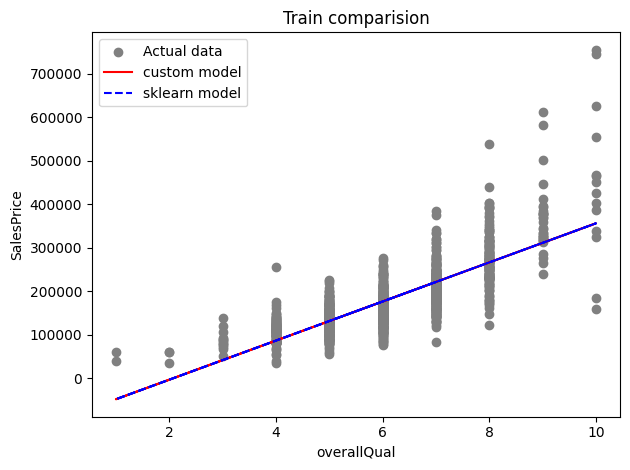

In [ ]:
# Plot 1 (Train Comparison): Plot the custom model vs sklearn model predictions on train set.
plt.scatter(x_train,y_train,color='gray', label='Actual data')
plt.plot(x_train,custom_model.predict(x_train), color='red', label='custom model')
plt.plot(x_train,sklearn_model.predict(x_train), color='blue', linestyle='--', label='sklearn model')
plt.title('Train comparision')
plt.xlabel('overallQual')
plt.ylabel('SalesPrice')
plt.legend()
plt.tight_layout()
plt.show()

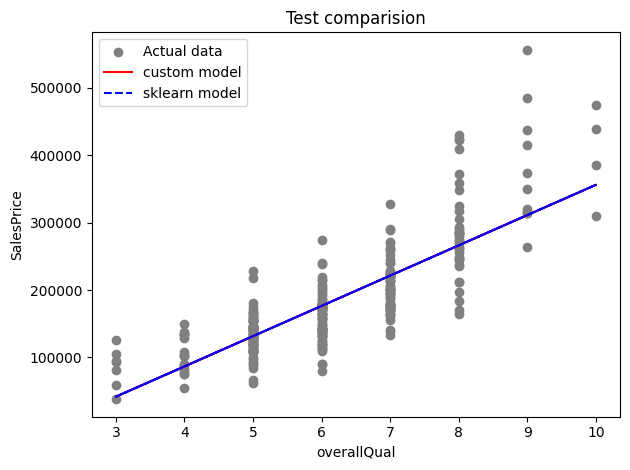

In [ ]:
# Plot 2 (Test Comparison): Plot the custom model vs sklearn model predictions on Test set.
plt.scatter(x_test,y_test,color='gray', label='Actual data')
plt.plot(x_test,custom_model.predict(x_test), color='red', label='custom model')
plt.plot(x_test,sklearn_model.predict(x_test), color='blue', linestyle='--', label='sklearn model')
plt.title('Test comparision')
plt.xlabel('overallQual')
plt.ylabel('SalesPrice')
plt.legend()
plt.tight_layout()
plt.show()

**Question 2: Logistic Regression — Predicting Student Pass/Fail Outcome**

1. Preprocess the Data

In [ ]:
# loading the dataset
dataframe=pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
# first 5 rows
dataframe.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# last 5 rows
dataframe.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
dataframe.shape

(1000, 8)

In [ ]:
# Create a new column PassedMath (1 if math score ≥ 50 and 0 otherwise)
dataframe['PassedMath']=np.where(dataframe['math score']>=50,1,0)

In [ ]:
# separating features and target
x=dataframe['reading score'].values
y=dataframe['PassedMath'].values

In [ ]:
#splitting the dataset into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=2)

2. Train Logistic Regression from Scratch


In [ ]:

class Logistic_RegressionScratch():
  # declaring the no. of iteration and learning rate
  def  __init__(self,learning_rate,no_of_iterations):
    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

# fit function to train the model with dataset
  def  fit(self,x,y):
     # no of data points in a dataset=no. of rows-----m
     # no. of input features in a dataset=no.of columns-----n
    self.m,self.n=x.shape

    # initiating weights and bias value
    self.w=np.zeros(self.n)
    self.b=0
    self.x=x
    self.y=y
    # implementing gradient descent for optimization
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self,):
    # y_hat formula(sigmoid function)
    y_hat=1/(1+np.exp(-(self.x.dot(self.w)+self.b)))
    # DERIVATIVES
    dw=(1/self.m)*np.dot(self.x.T,(y_hat-self.y))
    db=(1/self.m)*np.sum(y_hat-self.y)

    # updating the weights and bias value
    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db

  def  predict(self,x):
    # sigmoid function and decision boundary
    y_pred=1/(1+np.exp(-(x.dot(self.w)+self.b)))
    y_pred=np.where(y_pred>0.5,1,0)
    return y_pred

In [ ]:
custom_Model=Logistic_RegressionScratch(learning_rate=0.01,no_of_iterations=1000)
x_train = x_train.reshape(-1, 1)
custom_Model.fit(x_train,y_train)

3. Test Your Custom Model

In [ ]:
# predict outcomes on the test set.
x_test=x_test.reshape(-1,1)
y_predict_custom=custom_Model.predict(x_test)


In [ ]:
# calculating accuracy score
accuracyScore=accuracy_score(y_test,y_predict_custom)
confusionMatrix=confusion_matrix(y_test,y_predict_custom)


In [ ]:
print(accuracyScore)

0.85


In [ ]:
print(confusion_matrix)

<function confusion_matrix at 0x7b3e2b022c00>


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_predict_custom))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.03      0.06        31
           1       0.85      1.00      0.92       169

    accuracy                           0.85       200
   macro avg       0.92      0.52      0.49       200
weighted avg       0.87      0.85      0.79       200



4. Train and Test Sklearn’s LogisticRegression Model

In [ ]:
sk_model=LogisticRegression()
sk_model.fit(x_train,y_train)
y_predict_sklearn=sk_model.predict(x_test)


In [ ]:
accuracy=accuracy_score(y_test,y_predict_sklearn)
conf_matrix=confusion_matrix(y_test,y_predict_sklearn)



In [ ]:
print(accuracy)

0.875


In [ ]:
print(conf_matrix)

[[ 11  20]
 [  5 164]]


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_predict_custom))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.03      0.06        31
           1       0.85      1.00      0.92       169

    accuracy                           0.85       200
   macro avg       0.92      0.52      0.49       200
weighted avg       0.87      0.85      0.79       200



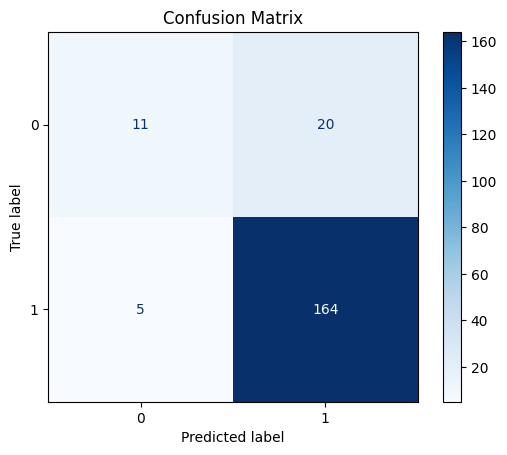

In [ ]:
#ploting the confusion matrix.
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()